In [1]:
import pandas as pd
import json
import requests
import time
import datetime as dt
from scipy.stats import linregress
import requests
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [63]:
import requests
import pandas as pd
import json

player20Url = "https://api-nba-v1.p.rapidapi.com/players/statistics?id=20&season=2021"
player279Url = "https://api-nba-v1.p.rapidapi.com/players/statistics?id=279&season=2021"
player159Url = "https://api-nba-v1.p.rapidapi.com/players/statistics?id=159&season=2021"
player124Url = "https://api-nba-v1.p.rapidapi.com/players/statistics?id=124&season=2021"
headers = {
	"X-RapidAPI-Key": api_key,
	"X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com"
}
#payload={}
player20APIResponse = requests.request("GET", player20Url, headers=headers)
player279APIResponse = requests.request("GET", player279Url, headers=headers)
player159APIResponse = requests.request("GET", player159Url, headers=headers)
player124APIResponse = requests.request("GET", player124Url, headers=headers)
#print(teamAPIResponse.json())

player20APIResponse.json().keys()
player279APIResponse.json().keys()
player159APIResponse.json().keys()
player124APIResponse.json().keys()

player20Dict = player20APIResponse.json()['response']
player279Dict = player279APIResponse.json()['response']
player159Dict = player159APIResponse.json()['response']
player124Dict = player124APIResponse.json()['response']

#teamDF = pd.DataFrame.from_dict(teamDict)
#display(teamDF)
player20DF = pd.DataFrame.from_dict(player20Dict)
player279DF = pd.DataFrame.from_dict(player279Dict)
player159DF = pd.DataFrame.from_dict(player159Dict)
player124DF = pd.DataFrame.from_dict(player124Dict)

number20ofGames = player20DF.pos.count()
number279ofGames = player279DF.pos.count()
number159ofGames = player159DF.pos.count()
number124ofGames = player124DF.pos.count()

f'"Number of Games Played by Player 20 " {number20ofGames} " * Player 279 " {number279ofGames} " * Player 159 " {number159ofGames} " * Player 124 " {number124ofGames}'

'"Number of Games Played by Player 20 " 83 " * Player 279 " 83 " * Player 159 " 79 " * Player 124 " 87'

In [4]:
#See Data Types

player20DF.dtypes

player        object
team          object
game          object
points       float64
pos           object
min           object
fgm          float64
fga          float64
fgp           object
ftm          float64
fta          float64
ftp           object
tpm          float64
tpa          float64
tpp           object
offReb       float64
defReb       float64
totReb       float64
assists      float64
pFouls       float64
steals       float64
turnovers    float64
blocks       float64
plusMinus     object
comment       object
dtype: object

In [5]:
# converting "plusMinus", "fgp", "ftp", & "tpp" key to float from object

player20DF["plusMinus"] = player20DF.plusMinus.astype(float)
player279DF["plusMinus"] = player279DF.plusMinus.astype(float)
player159DF["plusMinus"] = player159DF.plusMinus.astype(float)
player124DF["plusMinus"] = player124DF.plusMinus.astype(float)


player20DF["fgp"] = player20DF.fgp.astype(float)
player279DF["fgp"] = player279DF.fgp.astype(float)
player159DF["fgp"] = player159DF.fgp.astype(float)
player124DF["fgp"] = player124DF.fgp.astype(float)

player20DF["ftp"] = player20DF.ftp.astype(float)
player279DF["ftp"] = player279DF.ftp.astype(float)
player159DF["ftp"] = player159DF.ftp.astype(float)
player124DF["ftp"] = player124DF.ftp.astype(float)


player20DF["tpp"] = player20DF.tpp.astype(float)
player279DF["tpp"] = player279DF.tpp.astype(float)
player159DF["tpp"] = player159DF.tpp.astype(float)
player124DF["tpp"] = player124DF.tpp.astype(float)

player159DF.dtypes

player        object
team          object
game          object
points       float64
pos           object
min           object
fgm          float64
fga          float64
fgp          float64
ftm          float64
fta          float64
ftp          float64
tpm          float64
tpa          float64
tpp          float64
offReb       float64
defReb       float64
totReb       float64
assists      float64
pFouls       float64
steals       float64
turnovers    float64
blocks       float64
plusMinus    float64
comment       object
dtype: object

In [6]:
# changing player124df to float data type for the ones that were intergers while the other 3 had float

player124DF["points"] = player124DF.points.astype(float)
player124DF["fgm"] = player124DF.fgm.astype(float)
player124DF["fga"] = player124DF.fga.astype(float)
player124DF["ftm"] = player124DF.ftm.astype(float)
player124DF["fta"] = player124DF.fta.astype(float)
player124DF["tpm"] = player124DF.tpm.astype(float)
player124DF["tpa"] = player124DF.tpa.astype(float)
player124DF["offReb"] = player124DF.offReb.astype(float)
player124DF["defReb"] = player124DF.defReb.astype(float)
player124DF["totReb"] = player124DF.totReb.astype(float)
player124DF["assists"] = player124DF.assists.astype(float)
player124DF["pFouls"] = player124DF.pFouls.astype(float)
player124DF["steals"] = player124DF.steals.astype(float)
player124DF["turnovers"] = player124DF.turnovers.astype(float)
player124DF["blocks"] = player124DF.blocks.astype(float)


player124DF.dtypes

player        object
team          object
game          object
points       float64
pos           object
min           object
fgm          float64
fga          float64
fgp          float64
ftm          float64
fta          float64
ftp          float64
tpm          float64
tpa          float64
tpp          float64
offReb       float64
defReb       float64
totReb       float64
assists      float64
pFouls       float64
steals       float64
turnovers    float64
blocks       float64
plusMinus    float64
comment       object
dtype: object

In [7]:
avgfor20 = player20DF.sum(numeric_only = True)/number20ofGames
print(avgfor20)

points       29.722892
fgm          10.433735
fga          19.060241
fgp          55.037349
ftm           7.843373
fta          10.987952
ftp          70.497590
tpm           1.012048
tpa           3.518072
tpp          26.977108
offReb        2.036145
defReb        9.831325
totReb       11.867470
assists       5.879518
pFouls        3.120482
steals        1.048193
turnovers     3.361446
blocks        1.301205
plusMinus     5.975904
dtype: float64


In [8]:
avgfor279 = player279DF.sum(numeric_only = True)/number279ofGames
print(avgfor279)

points       26.722892
fgm          10.204819
fga          17.518072
fgp          59.877108
ftm           5.000000
fta           6.144578
ftp          78.972289
tpm           1.313253
tpa           3.855422
tpp          33.878313
offReb        2.795181
defReb       10.759036
totReb       13.554217
assists       7.686747
pFouls        2.638554
steals        1.445783
turnovers     3.746988
blocks        0.879518
plusMinus     4.927711
dtype: float64


In [9]:
avgfor159 = player159DF.sum(numeric_only = True)/number159ofGames
print(avgfor159)

points       29.101266
fgm           9.417722
fga          18.797468
fgp          49.706329
ftm           8.962025
fta          10.974684
ftp          82.474684
tpm           1.303797
tpa           3.620253
tpp          34.739241
offReb        2.075949
defReb        9.189873
totReb       11.265823
assists       3.911392
pFouls        2.721519
steals        1.012658
turnovers     3.088608
blocks        1.291139
plusMinus     4.835443
dtype: float64


In [10]:
avgfor124 = player124DF.sum(numeric_only = True)/number124ofGames
print(avgfor124)

points       27.356322
fgm           9.057471
fga          20.241379
fgp          46.386207
ftm           4.540230
fta           5.091954
ftp          82.527586
tpm           4.701149
tpa          12.045977
tpp          40.166667
offReb        0.528736
defReb        4.908046
totReb        5.436782
assists       6.264368
pFouls        2.218391
steals        1.436782
turnovers     3.218391
blocks        0.379310
plusMinus     7.563218
dtype: float64


In [11]:
# creating a dateframe to show the top 4 players in the MVP race 
#from url https://ak-static.cms.nba.com/wp-content/uploads/sites/46/2021/06/2020-21-NBA-MVP-Voting-Results-Announcement.pdf

# player IDs

# 20 Giannis Antetokounmpo
# 279 Nikola Jokić
# 159 Joel Embiid
# 124 Stephen Curry


# MVP Votes  of 4 players
mvp_votes = pd.Series([348, 971, 586, 453], index=["20", "279", "159", "124"])

# Create a data frame
mvp_votes_df = pd.DataFrame([mvp_votes]).T

# Rename columns
mvp_votes_df.columns = ["MVP votes"]

mvp_votes_df

,MVP votes
20,348
279,971
159,586
124,453


In [12]:
#create DataFrame of statistics to use for charts
statistics_df = pd.DataFrame({'points': [29.722892, 26.722892, 29.101266, 27.356322],
                    'fmg':[10.433735,10.204819, 9.417722, 9.057471],
                    'fga':[19.060241,17.518072, 18.797468, 20.241379],
                    'fgp': [55.037349, 59.877108, 49.706329, 46.386207],
                    'ftm':[7.843373, 5.000000, 8.962025,4.540230],
                    'fta':[10.987952, 6.144578, 10.974684, 5.091954],
                    'ftp': [70.497590, 78.972289,82.474684, 82.527586],
                    'tpm':[1.012048, 1.313253, 1.303797, 4.701149],
                    'tpa':[3.518072, 3.855422, 3.620253, 12.045977],
                    'tpp':[26.977108, 33.878313,34.739241,40.166667],
                    'offReb':[2.036145, 2.795181, 2.075949, 0.528736],
                    'defReb':[9.831325, 10.759036, 9.189873, 4.908046],
                    'totReb':[11.867470, 13.554217, 11.265823, 5.436782],
                    'assists':[5.879518, 7.686747, 3.911392, 6.264368],
                    'pFouls':[3.120482, 2.638554, 2.721519, 2.218391],
                    'steals':[1.048193, 1.445783, 1.012658, 1.436782],
                    'turnovers':[3.361446, 3.746988, 3.088608, 3.218391],
                    'blocks':[1.301205, 0.879518, 1.291139, 0.379310],
                    'plusMinus':[5.975904, 4.927711, 4.835443, 7.563218],
                    'mvpvotes': [348, 971, 586, 453]}, index=["20", "279", "159", "124"])     





#view DataFrame
statistics_df

,points,fmg,fga,fgp,ftm,fta,ftp,tpm,tpa,tpp,offReb,defReb,totReb,assists,pFouls,steals,turnovers,blocks,plusMinus,mvpvotes
20,29.722892,10.433735,19.060241,55.037349,7.843373,10.987952,70.497590,1.012048,3.518072,26.977108,2.036145,9.831325,11.867470,5.879518,3.120482,1.048193,3.361446,1.301205,5.975904,348
279,26.722892,10.204819,17.518072,59.877108,5.000000,6.144578,78.972289,1.313253,3.855422,33.878313,2.795181,10.759036,13.554217,7.686747,2.638554,1.445783,3.746988,0.879518,4.927711,971
159,29.101266,9.417722,18.797468,49.706329,8.962025,10.974684,82.474684,1.303797,3.620253,34.739241,2.075949,9.189873,11.265823,3.911392,2.721519,1.012658,3.088608,1.291139,4.835443,586
124,27.356322,9.057471,20.241379,46.386207,4.540230,5.091954,82.527586,4.701149,12.045977,40.166667,0.528736,4.908046,5.436782,6.264368,2.218391,1.436782,3.218391,0.379310,7.563218,453


In [40]:
import pandas as pd
import requests
import json
import pprint

player_ids = [20, 279, 159, 124]
game_statistics = []
for player_id in player_ids:
    querystring = {"id":player_id,"season":"2021"}
    response = requests.get(url, headers=headers, params=querystring)
    statistics = response.json()["response"]
    #print(json.dumps(statistics, sort_keys=True, indent=4))
    for s in statistics:
        if (s["min"] is not None):
            game_statistics.append({
                "name" : s["player"]["firstname"] + ' ' + s["player"]["lastname"],
                "assists":s["assists"],
                "fga":s["fga"],
                "fgm":s["fgm"],
                "min": float(s["min"].split(":")[0]) + float(s["min"].split(":")[1]) /60,
                "offReb":s["offReb"],
                "pFouls": s["pFouls"],
                "points": s["points"],
                "plusMinus": float(s["plusMinus"])
            })
game_df = pd.DataFrame(game_statistics)
mean_df = game_df.groupby(['name']).mean()
count_df = game_df.groupby(['name'])["min"].count().to_frame("games")["games"]
final_df = pd.merge(count_df,mean_df,on='name',how='left')
final_df

,games,assists,fga,fgm,min,offReb,pFouls,points,plusMinus
name,,,,,,,,,
Giannis Antetokounmpo,83,5.879518,19.060241,10.433735,33.035743,2.036145,3.120482,29.722892,5.975904
Joel Embiid,79,3.911392,18.797468,9.417722,33.744726,2.075949,2.721519,29.101266,4.835443
Nikola Jokic,84,7.595238,17.309524,10.083333,32.617063,2.761905,2.607143,26.404762,4.869048
Stephen Curry,92,5.923913,19.141304,8.565217,33.714312,0.500000,2.097826,25.869565,7.152174


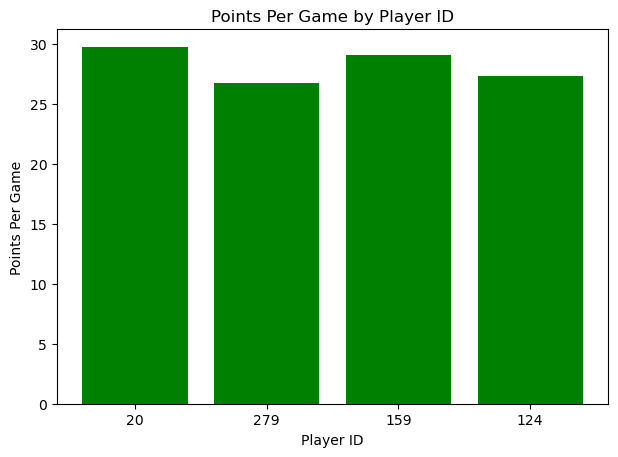

In [13]:
# bar chart showing players by points per game
players = ["20", "279", "159", "124"]
points_per_game = [29.722892, 26.722892, 29.101266, 27.356322]


x_axis = np.arange(len(points_per_game))
plt.bar(x_axis, points_per_game, color="g", align="center")


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, players)

plt.title("Points Per Game by Player ID")
plt.xlabel("Player ID")
plt.ylabel("Points Per Game")

plt.style.use('fivethirtyeight')
plt.tight_layout ()

plt.show()

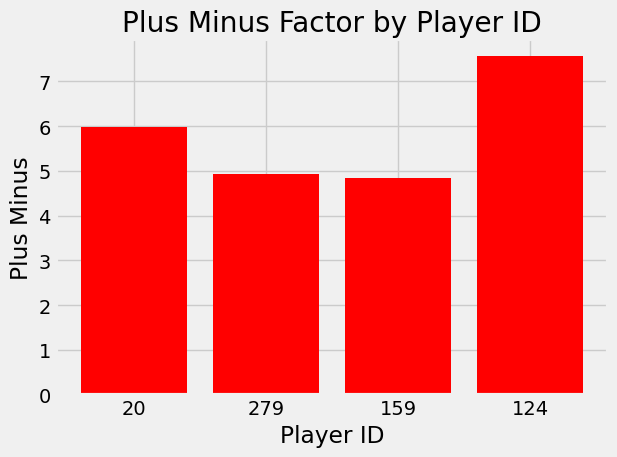

In [14]:
# bar chart showing players by plus_minus
players = ["20", "279", "159", "124"]
plus_minus = [5.975904, 4.927711, 4.835443, 7.563218]


x_axis = np.arange(len(points_per_game))
plt.bar(x_axis, plus_minus, color="r", align="center")


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, players)

plt.title("Plus Minus Factor by Player ID")
plt.xlabel("Player ID")
plt.ylabel("Plus Minus")

plt.style.use('fivethirtyeight')
plt.tight_layout ()

plt.show()

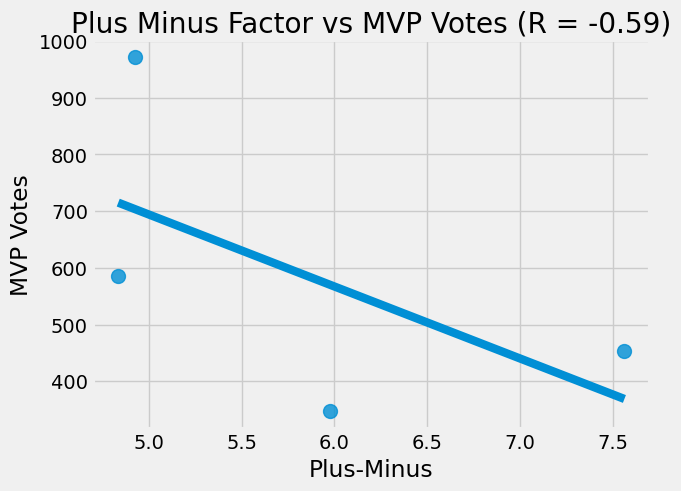

Correlation Coefficient (r value): -0.59


In [15]:
# Scatter Plot comparing Plus Minus Factor vs MVP Votes

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Extract relevant columns from the DataFrame
plus_minus = statistics_df['plusMinus']
mvp_votes = statistics_df['mvpvotes']

# Create a scatter plot with a regression line
sns.regplot(x=plus_minus, y=mvp_votes, scatter_kws={'s': 100}, ci=None)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(plus_minus, mvp_votes)

# Add labels and title
plt.xlabel('Plus-Minus')
plt.ylabel('MVP Votes')
plt.title('Plus Minus Factor vs MVP Votes (R = {:.2f})'.format(r_value))


# Display the plot
plt.show()

# Print the calculated r value
print("Correlation Coefficient (r value): {:.2f}".format(r_value))

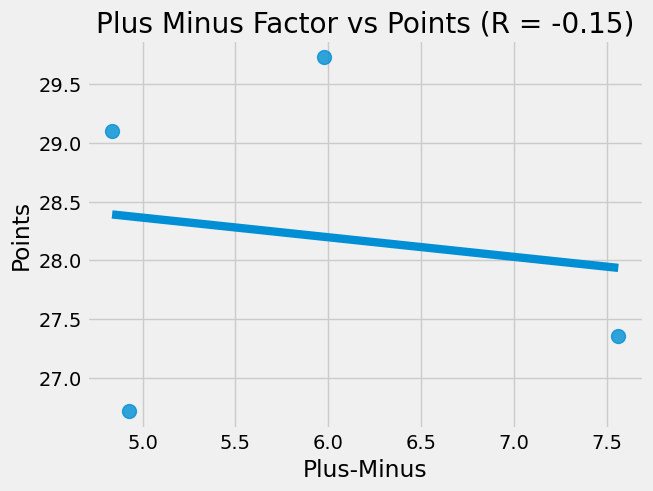

Correlation Coefficient (r value): -0.15


In [21]:
# Scatter Plot comparing Plus Minus Factor vs points per game

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Extract relevant columns from the DataFrame
plus_minus = statistics_df['plusMinus']
points = statistics_df['points']

# Create a scatter plot with a regression line
sns.regplot(x=plus_minus, y=points, scatter_kws={'s': 100}, ci=None)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(plus_minus, points)

# Add labels and title
plt.xlabel('Plus-Minus')
plt.ylabel('Points')
plt.title('Plus Minus Factor vs Points (R = {:.2f})'.format(r_value))

# Display the plot
plt.show()

# Print the calculated r value
print("Correlation Coefficient (r value): {:.2f}".format(r_value))

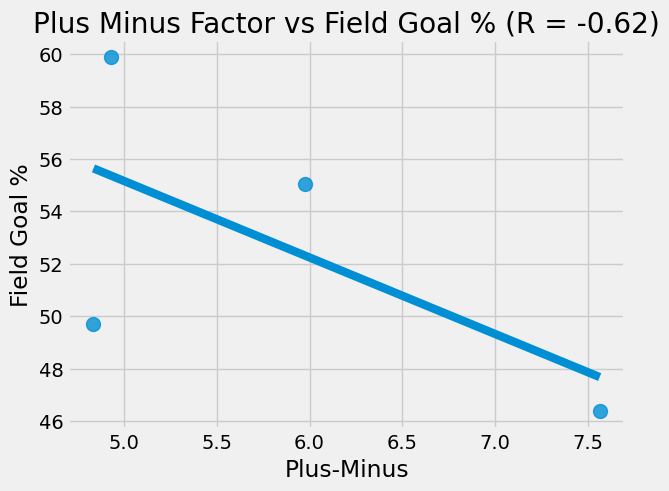

Correlation Coefficient (r value): -0.62


In [22]:
# Scatter Plot comparing Plus Minus Factor vs Field goal percentage

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Extract relevant columns from the DataFrame
plus_minus = statistics_df['plusMinus']
fgp = statistics_df['fgp']

# Create a scatter plot with a regression line
sns.regplot(x=plus_minus, y=fgp, scatter_kws={'s': 100}, ci=None)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(plus_minus, fgp)

# Add labels and title
plt.xlabel('Plus-Minus')
plt.ylabel('Field Goal %')
plt.title('Plus Minus Factor vs Field Goal % (R = {:.2f})'.format(r_value))

# Display the plot
plt.show()

# Print the calculated r value
print("Correlation Coefficient (r value): {:.2f}".format(r_value))

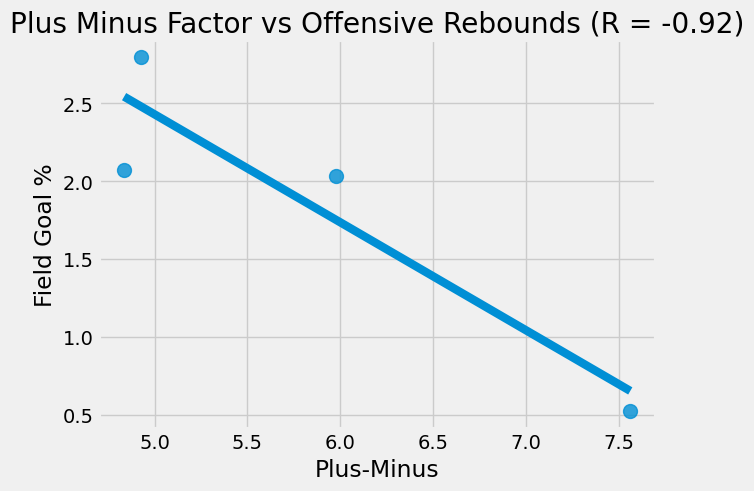

Correlation Coefficient (r value): -0.92


In [23]:
# Scatter Plot comparing Plus Minus Factor vs offensive rebounds

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Extract relevant columns from the DataFrame
plus_minus = statistics_df['plusMinus']
offReb = statistics_df['offReb']

# Create a scatter plot with a regression line
sns.regplot(x=plus_minus, y=offReb, scatter_kws={'s': 100}, ci=None)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(plus_minus, offReb)

# Add labels and title
plt.xlabel('Plus-Minus')
plt.ylabel('Field Goal %')
plt.title('Plus Minus Factor vs Offensive Rebounds (R = {:.2f})'.format(r_value))

# Display the plot
plt.show()

# Print the calculated r value
print("Correlation Coefficient (r value): {:.2f}".format(r_value))

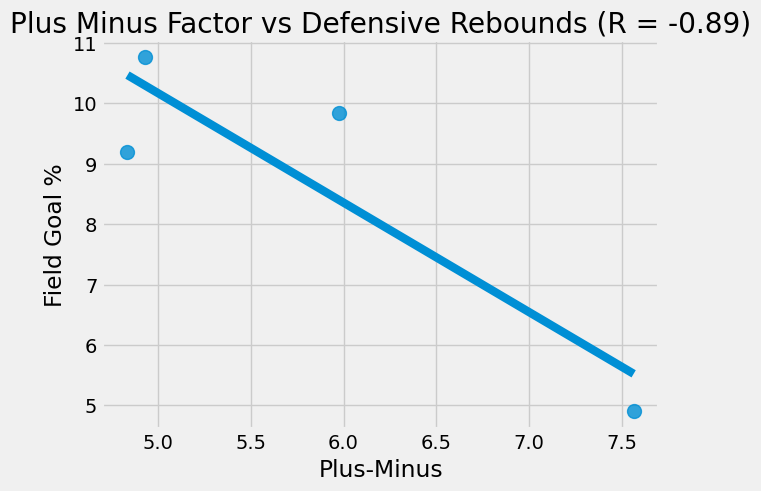

Correlation Coefficient (r value): -0.89


In [24]:
# Scatter Plot comparing Plus Minus Factor vs defensive rebounds

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Extract relevant columns from the DataFrame
plus_minus = statistics_df['plusMinus']
defReb = statistics_df['defReb']

# Create a scatter plot with a regression line
sns.regplot(x=plus_minus, y=defReb, scatter_kws={'s': 100}, ci=None)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(plus_minus, defReb)

# Add labels and title
plt.xlabel('Plus-Minus')
plt.ylabel('Field Goal %')
plt.title('Plus Minus Factor vs Defensive Rebounds (R = {:.2f})'.format(r_value))

# Display the plot
plt.show()

# Print the calculated r value
print("Correlation Coefficient (r value): {:.2f}".format(r_value))

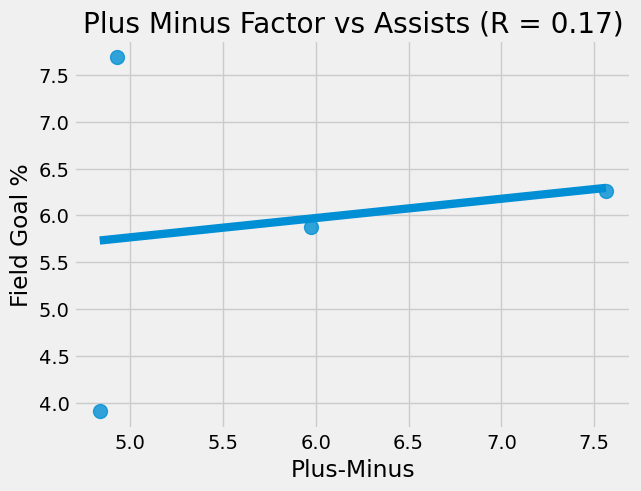

Correlation Coefficient (r value): 0.17


In [25]:
# Scatter Plot comparing Plus Minus Factor vs assists

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Extract relevant columns from the DataFrame
plus_minus = statistics_df['plusMinus']
assists = statistics_df['assists']

# Create a scatter plot with a regression line
sns.regplot(x=plus_minus, y=assists, scatter_kws={'s': 100}, ci=None)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(plus_minus, assists)

# Add labels and title
plt.xlabel('Plus-Minus')
plt.ylabel('Field Goal %')
plt.title('Plus Minus Factor vs Assists (R = {:.2f})'.format(r_value))

# Display the plot
plt.show()

# Print the calculated r value
print("Correlation Coefficient (r value): {:.2f}".format(r_value))

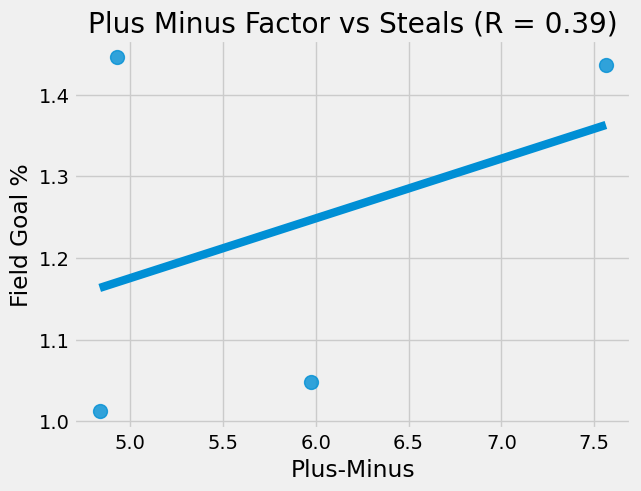

Correlation Coefficient (r value): 0.39


In [26]:
# Scatter Plot comparing Plus Minus Factor vs steals

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Extract relevant columns from the DataFrame
plus_minus = statistics_df['plusMinus']
steals = statistics_df['steals']

# Create a scatter plot with a regression line
sns.regplot(x=plus_minus, y=steals, scatter_kws={'s': 100}, ci=None)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(plus_minus, steals)

# Add labels and title
plt.xlabel('Plus-Minus')
plt.ylabel('Field Goal %')
plt.title('Plus Minus Factor vs Steals (R = {:.2f})'.format(r_value))

# Display the plot
plt.show()

# Print the calculated r value
print("Correlation Coefficient (r value): {:.2f}".format(r_value))

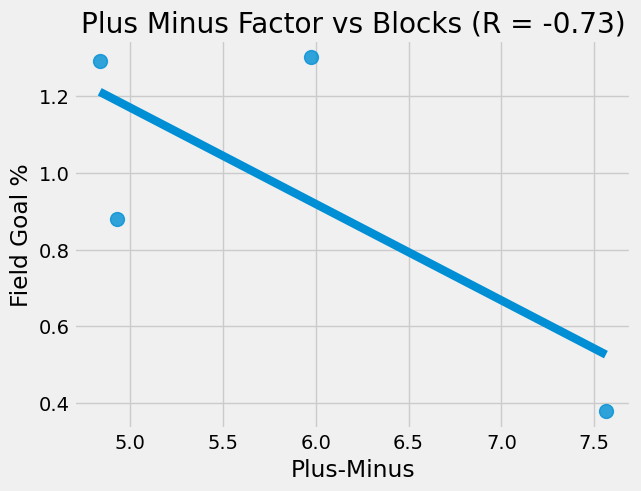

Correlation Coefficient (r value): -0.73


In [27]:
# Scatter Plot comparing Plus Minus Factor vs blocks

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Extract relevant columns from the DataFrame
plus_minus = statistics_df['plusMinus']
blocks = statistics_df['blocks']

# Create a scatter plot with a regression line
sns.regplot(x=plus_minus, y=blocks, scatter_kws={'s': 100}, ci=None)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(plus_minus, blocks)

# Add labels and title
plt.xlabel('Plus-Minus')
plt.ylabel('Field Goal %')
plt.title('Plus Minus Factor vs Blocks (R = {:.2f})'.format(r_value))

# Display the plot
plt.show()

# Print the calculated r value
print("Correlation Coefficient (r value): {:.2f}".format(r_value))

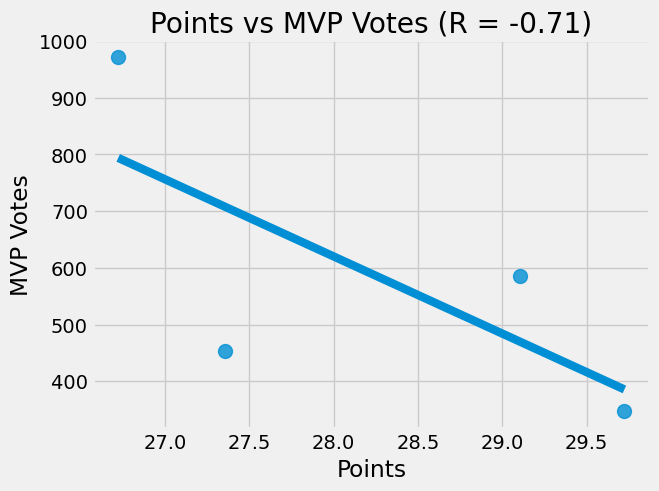

Correlation Coefficient (r value): -0.71


In [28]:
# Scatter Plot comparing Points vs MVP Votes

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Extract relevant columns from the DataFrame
points = statistics_df['points']
mvp_votes = statistics_df['mvpvotes']

# Create a scatter plot with a regression line
sns.regplot(x=points, y=mvp_votes, scatter_kws={'s': 100}, ci=None)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(points, mvp_votes)

# Add labels and title
plt.xlabel('Points')
plt.ylabel('MVP Votes')
plt.title('Points vs MVP Votes (R = {:.2f})'.format(r_value))

# Display the plot
plt.show()

# Print the calculated r value
print("Correlation Coefficient (r value): {:.2f}".format(r_value))

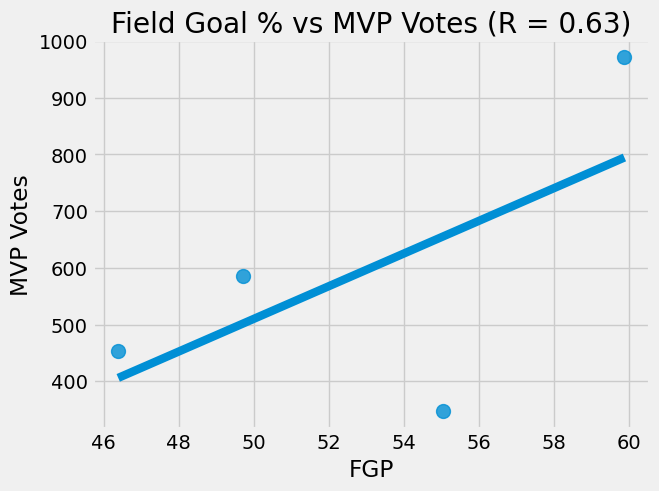

Correlation Coefficient (r value): 0.63


In [29]:
# Scatter Plot comparing Field Goal Percentage vs MVP Votes

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Extract relevant columns from the DataFrame
fgp = statistics_df['fgp']
mvp_votes = statistics_df['mvpvotes']

# Create a scatter plot with a regression line
sns.regplot(x=fgp, y=mvp_votes, scatter_kws={'s': 100}, ci=None)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(fgp, mvp_votes)

# Add labels and title
plt.xlabel('FGP')
plt.ylabel('MVP Votes')
plt.title('Field Goal % vs MVP Votes (R = {:.2f})'.format(r_value))

# Display the plot
plt.show()

# Print the calculated r value
print("Correlation Coefficient (r value): {:.2f}".format(r_value))

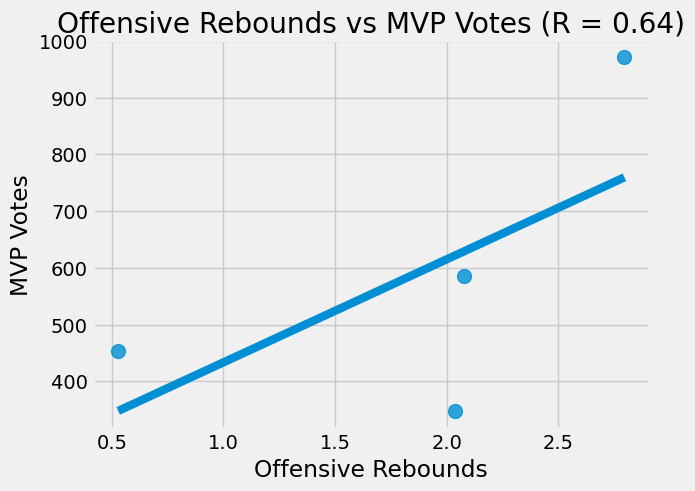

Correlation Coefficient (r value): 0.64


In [30]:
# Scatter Plot comparing Offensive Rebounds vs MVP Votes

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Extract relevant columns from the DataFrame
offReb = statistics_df['offReb']
mvp_votes = statistics_df['mvpvotes']

# Create a scatter plot with a regression line
sns.regplot(x=offReb, y=mvp_votes, scatter_kws={'s': 100}, ci=None)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(offReb, mvp_votes)

# Add labels and title
plt.xlabel('Offensive Rebounds')
plt.ylabel('MVP Votes')
plt.title('Offensive Rebounds vs MVP Votes (R = {:.2f})'.format(r_value))

# Display the plot
plt.show()

# Print the calculated r value
print("Correlation Coefficient (r value): {:.2f}".format(r_value))

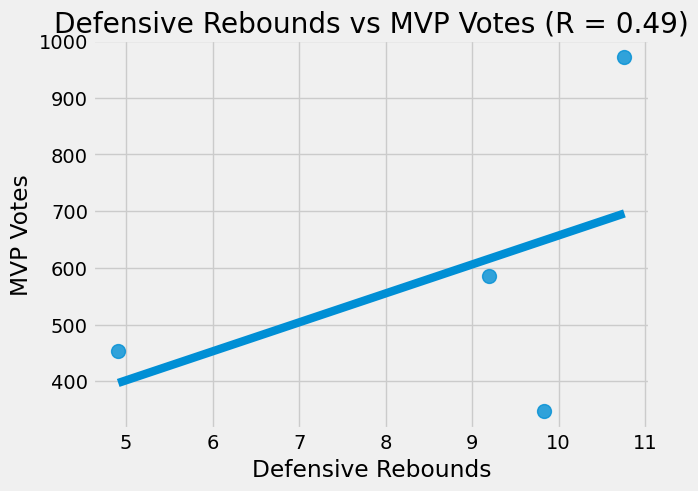

Correlation Coefficient (r value): 0.49


In [31]:
# Scatter Plot comparing Defensive Rebounds vs MVP Votes

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Extract relevant columns from the DataFrame
defReb = statistics_df['defReb']
mvp_votes = statistics_df['mvpvotes']

# Create a scatter plot with a regression line
sns.regplot(x=defReb, y=mvp_votes, scatter_kws={'s': 100}, ci=None)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(defReb, mvp_votes)

# Add labels and title
plt.xlabel('Defensive Rebounds')
plt.ylabel('MVP Votes')
plt.title('Defensive Rebounds vs MVP Votes (R = {:.2f})'.format(r_value))

# Display the plot
plt.show()

# Print the calculated r value
print("Correlation Coefficient (r value): {:.2f}".format(r_value))

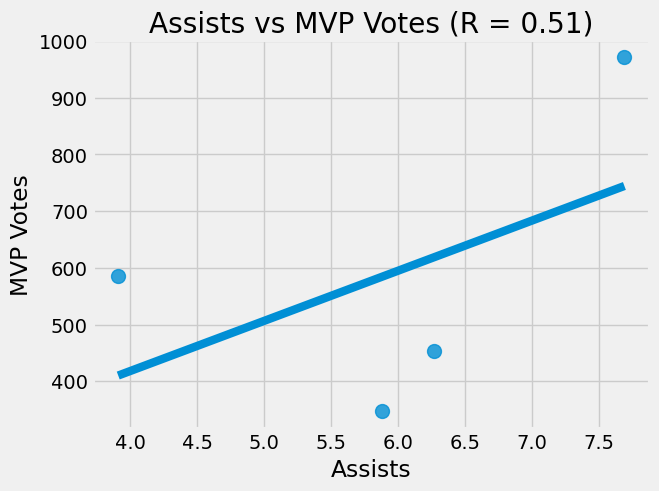

Correlation Coefficient (r value): 0.51


In [32]:
# Scatter Plot comparing Assists vs MVP Votes

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Extract relevant columns from the DataFrame
assists = statistics_df['assists']
mvp_votes = statistics_df['mvpvotes']

# Create a scatter plot with a regression line
sns.regplot(x=assists, y=mvp_votes, scatter_kws={'s': 100}, ci=None)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(assists, mvp_votes)

# Add labels and title
plt.xlabel('Assists')
plt.ylabel('MVP Votes')
plt.title('Assists vs MVP Votes (R = {:.2f})'.format(r_value))

# Display the plot
plt.show()

# Print the calculated r value
print("Correlation Coefficient (r value): {:.2f}".format(r_value))

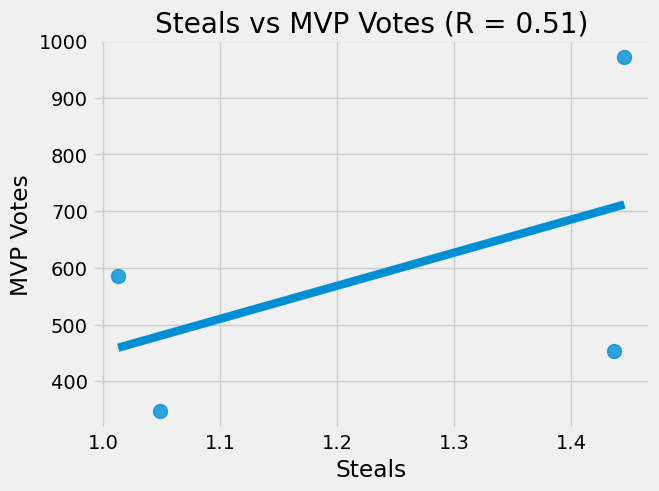

Correlation Coefficient (r value): 0.51


In [33]:
# Scatter Plot comparing Steals vs MVP Votes

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Extract relevant columns from the DataFrame
steals = statistics_df['steals']
mvp_votes = statistics_df['mvpvotes']

# Create a scatter plot with a regression line
sns.regplot(x=steals, y=mvp_votes, scatter_kws={'s': 100}, ci=None)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(steals, mvp_votes)

# Add labels and title
plt.xlabel('Steals')
plt.ylabel('MVP Votes')
plt.title('Steals vs MVP Votes (R = {:.2f})'.format(r_value))

# Display the plot
plt.show()

# Print the calculated r value
print("Correlation Coefficient (r value): {:.2f}".format(r_value))

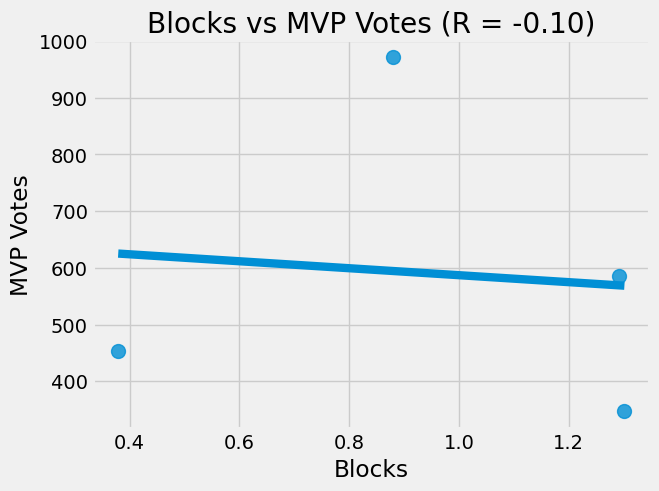

Correlation Coefficient (r value): -0.10


In [34]:
# Scatter Plot comparing Blocks vs MVP Votes

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Extract relevant columns from the DataFrame
blocks = statistics_df['blocks']
mvp_votes = statistics_df['mvpvotes']

# Create a scatter plot with a regression line
sns.regplot(x=blocks, y=mvp_votes, scatter_kws={'s': 100}, ci=None)

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(blocks, mvp_votes)

# Add labels and title
plt.xlabel('Blocks')
plt.ylabel('MVP Votes')
plt.title('Blocks vs MVP Votes (R = {:.2f})'.format(r_value))

# Display the plot
plt.show()
plt.style.use('fivethirtyeight')

# Print the calculated r value
print("Correlation Coefficient (r value): {:.2f}".format(r_value))

In [38]:
import pandas as pd
import requests
import json
import pprint
url = "https://api-nba-v1.p.rapidapi.com/players/statistics"
headers = {
    "X-RapidAPI-Key":"6caaf6eabamshb3949e385e11ebap1c014ejsn39d188de698b",
    "X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com"
}
player_ids = [20, 279, 159, 124]
game_statistics = []
for player_id in player_ids:
    querystring = {"id":player_id,"season":"2021"}
    response = requests.get(url, headers=headers, params=querystring)
    statistics = response.json()["response"]
    #print(json.dumps(statistics, sort_keys=True, indent=4))
    for s in statistics:
        if (s["min"] is not None):
            game_statistics.append({
                "name" : s["player"]["firstname"] + ' ' + s["player"]["lastname"],
                "assists":s["assists"],
                "fga":s["fga"],
                "fgm":s["fgm"],
                "min": float(s["min"].split(":")[0]) + float(s["min"].split(":")[1]) /60,
                "offReb":s["offReb"],
                "pFouls": s["pFouls"],
                "points": s["points"],
                "plusMinus": float(s["plusMinus"])
            })
game_df = pd.DataFrame(game_statistics)
mean_df = game_df.groupby(['name']).mean()
count_df = game_df.groupby(['name'])["min"].count().to_frame("games")["games"]
final_df = pd.merge(count_df,mean_df,on='name',how='left')
final_df

,games,assists,fga,fgm,min,offReb,pFouls,points,plusMinus
name,,,,,,,,,
Giannis Antetokounmpo,83,5.879518,19.060241,10.433735,33.035743,2.036145,3.120482,29.722892,5.975904
Joel Embiid,79,3.911392,18.797468,9.417722,33.744726,2.075949,2.721519,29.101266,4.835443
Nikola Jokic,84,7.595238,17.309524,10.083333,32.617063,2.761905,2.607143,26.404762,4.869048
Stephen Curry,92,5.923913,19.141304,8.565217,33.714312,0.500000,2.097826,25.869565,7.152174
